# File manipulation

## Exercise 1

Programm a script that creates a file containing the following message:
```
Hi!  
This is the last session of the python introductory course.  
We hope you have enjoyed it!
```
Afterwards, the programm must print the lines one by one, adding the line number at the beggining of them and the number of words of each one at the end.

#### Possible solution

In [1]:
fileHandle = open("file_1.txt", "w")
fileHandle.write("Hi!\n")
fileHandle.write("This is the last session of the python introductory course.\n")
fileHandle.close()

#Just to see how append mode works, not necessary:
fileHandle = open("file_1.txt", "a") 
fileHandle.write("We hope you have enjoyed it!\n")
fileHandle.close()

#Now we print the text.
fileHandle = open("file_1.txt", "r")
for i,line in enumerate(fileHandle):
    print(str(i) + " " + line[:-1] + " " + str(line.count(' ')+1) )

fileHandle.close()

0 Hi! 1
1 This is the last session of the python introductory course. 10
2 We hope you have enjoyed it! 6


Note that we have to use $\textit{line[:-1]}$ to avoid printing the jump-line character of each line, as the loop automatically prints line by line the text.

## Exercise 2

Create a script containing a function `file_coder()` that receives three parameters passed as input by the user: the name of both the file we we want to codify and the one we want to save the result in, in string format, and an integer number. 

The goal of this function is to codify the information in the input file and save the result in the output file, name of which will be passed as argument by the user. The method that you should use is the simple classical  $\textit{Caesar cipher}$, which consists of changing all characters by another one some fixed number of positions down the alphabet we are working with, in this case ASCII code. 

The script will have to make sure that the arguments are valid, so that they are in the corerct forma and making sure that exists such input file. If not, the programm will have to ask again for the arguments.

*Note*: Remember that in the end everything in your computer is saved as binarized numbers, 1-s or 0-s. As such, text or characters, must also be saved as numbers. The typical coding used to code each character of text into a number is the so called ASCII. For instance 'A' is saved as number 65, 'B' as 66 etc. You can find the dictionary bellow. In Python, in order to know the ASCII number for a character, say 'A' you can use the function `ord('A')`. On the other hand, if you need to convert an integer into its corresponding character, like 65 into 'A', you can use `ord(65)`.
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1b/ASCII-Table-wide.svg/875px-ASCII-Table-wide.svg.png" alt="Drawing" style="width: 600px;"/>



#### Possible solution

Definition of function:

In [2]:
def file_coder(infile, n, outfile):
    infileHandle = open(infile, "r")
    outfileHandle = open(outfile, "w")
    
    for line in infileHandle:
        for char in line[:-1]:
            outfileHandle.write(chr(ord(char)+n))
        
        outfileHandle.write('\n')
    
    infileHandle.close()
    outfileHandle.close()

Function call:

In [3]:
name_of_infile = input("Enter input file name:")
num_pos = int(input("Enter number of positions:"))
name_of_outfile = input("Enter output file name:")

try:
    file_coder(infile = name_of_infile, n = num_pos, outfile = name_of_outfile)

except IOError:
    print("Input file not found.")

print("\nCoded file:\n")
with open(name_of_outfile, 'r') as reader:    
    print(reader.read())

Enter input file name:file_1.txt
Enter number of positions:3
Enter output file name:out.txt

Coded file:

Kl$
Wklv#lv#wkh#odvw#vhvvlrq#ri#wkh#s|wkrq#lqwurgxfwru|#frxuvh1
Zh#krsh#|rx#kdyh#hqmr|hg#lw$



## Exercise 3

Let's now use .npy files for plotting data points. To do so, choose a certain number of points to plot $N$, a float $\lambda$, say $\lambda=0.5$ and plot the function $f(x;\lambda)=sin(x/\lambda)$ for a certain range $x\in[x_{min},x_{max}]$. Supose that you are receiving the x points from a `.npy` file. Therefore, the script should firstly create a grid of pints (hint: you can use the code of tha last session) and write the full list in a  `.npy ` file. Secondly, read the x points where the function has to be evaluated and then plot the result.

#### Possible solution

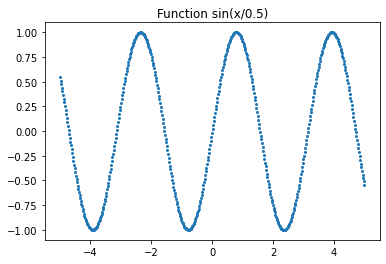

In [5]:
import numpy as np
import matplotlib.pyplot as plt

#define the function
def f(x, L):
    return np.sin(x/L) 

# Choose the parameters
L=0.5
xmin=-5
xmax=5
N=500 # number of points to plot

# Generate the points, save them and load them.
x = np.linspace(xmin, xmax, num=N)
np.save('xdata.npy', x)
y = f(np.load('xdata.npy'), L = L)

#Plot of the results
plt.plot(x, y, 'o', linewidth=1.0, markersize=2)
plt.title(f'Function sin(x/{L})')
plt.show()

## Exercise 4

Create a function that extracts, from a text file containing many arrays, only one of them. This function will receive as parameters the name of the file containing the arrays and the i-th position of the desired one. 

Finally, the script should ask the user for a file name and a the line of the matrix to be extracted, calls the function and prints the result.

Repeat the problem, but working with a .npz file. The result should be the same.

Advise: Use a small N to avoid probblems with the .txt file, for example N = 5.

#### Possible solution

Creation of the file containing the data:

In [78]:
import numpy as np
np.set_printoptions(threshold=np.inf)

n = 5 #n rows and n cols
matrix = np.random.randint(low = 10, high = 99, size = (n,n)) #creation of a random n x n integer matrix

#For txt file
with open("data.txt","w") as fileHandle:
    fileHandle.write(str(matrix))

#For npz file
np.savez_compressed("data.npz",matrix)

Definition of the functions:

In [100]:
import numpy as np
def LoadRowTXT(file, line):
    try:
        with open(file,"r") as fileHandle: 
            row = np.array(fileHandle.readlines()[line][1:])
            return row

    except IOError:
        print("File not found or incorrect format. Try again.")
        

def LoadRowNPZ(file, line):
    try:
        row = np.load(file)['arr_0'][line]
        return row

    except IOError:
        print("File not found or incorrect format. Try again.")
        

Function calls:

In [103]:
line = int(input("Line to be extracted:"))
file_txt = input("Name of .txt file:")
file_npz = input("Name of .npz file:")

print("\nResults:\n")
row = LoadRowTXT(file_txt, line)
print(row)

row = LoadRowNPZ(file_npz, line)
print(row)

Line to be extracted:1
Name of .txt file:data.txt
Name of .npz file:data.npz

Results:

[72 68 89 82 75]

[72 68 89 82 75]
